In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_eur = pd.read_csv('DEXUSEU.csv')

In [ ]:
df_eur.tail(2)

,DATE,DEXUSEU
6578,2024-03-21,1.0861
6579,2024-03-22,1.0817


In [ ]:
df_sp = pd.read_csv('^SPX.csv')

In [ ]:
df_sp.tail(2)

,DATE,Open,High,Low,Close,Adj Close,Volume
24174,2024-03-27,5226.310059,5249.259766,5213.919922,5248.490234,5248.490234,3850500000
24175,2024-03-28,5248.029785,5264.850098,5245.819824,5254.350098,5254.350098,3998270000


In [ ]:
df_gbp = pd.read_csv('DEXUSUK.csv')

In [ ]:
df_gbp.tail(2)

,DATE,DEXUSUK
13883,2024-03-21,1.267
13884,2024-03-22,1.2603


In [ ]:
df_nasdaq = pd.read_csv('NASDAQCOM.csv')

In [ ]:
df_nasdaq

,DATE,NASDAQCOM
0,1971-02-05,100.00
1,1971-02-08,100.84
2,1971-02-09,100.76
3,1971-02-10,100.69
4,1971-02-11,101.45
...,...,...
13860,2024-03-22,16428.82
13861,2024-03-25,16384.47
13862,2024-03-26,16315.70
13863,2024-03-27,16399.52


In [ ]:
df_yen = pd.read_csv('DEXJPUS.csv')

In [ ]:
df_yen.tail(2)

,DATE,DEXJPUS
13883,2024-03-21,151.59
13884,2024-03-22,151.35


In [ ]:
# S. Bureau of Economic Analysis, Balance on Current Account, NIPA's [NETFI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/NETFI, March 29, 2024.
df_cab = pd.read_csv('NETFI.csv')
df_cab = df_cab.rename({'NETFI': 'Balance Curr Acc'}, axis=1)

In [ ]:
#https://data.worldbank.org/indicator/PV.PER.RNK
df_pol = pd.read_csv('political_stab.csv')
df_pol.head(2)

,Indicator Name,Political Stability and Absence of Violence/Terrorism: Percentile Rank
0,1991,NaN
1,1992,NaN


In [ ]:
df_gdp = pd.read_csv('GDPC1.csv')
#U.S. Bureau of Economic Analysis, Real Gross Domestic Product [GDPC1], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDPC1, March 28, 2024.
df_gdp.head(2)

,DATE,GDPC1
0,1947-01-01,2182.681
1,1947-04-01,2176.892


In [ ]:
df_debt = pd.read_csv('GFDEBTN.csv')
#U.S. Department of the Treasury. Fiscal Service, Federal Debt: Total Public Debt [GFDEBTN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GFDEBTN, March 27, 2024.
df_debt.head(2)

,DATE,GFDEBTN
0,1966-01-01,320999.0
1,1966-04-01,316097.0


In [ ]:
df_infl = pd.read_csv('PCECTPI_quart.csv')
#https://fred.stlouisfed.org/series/PCECTPI
df_infl.head(2)

,DATE,PCECTPI
0,1947-01-01,11.557
1,1947-04-01,11.649


In [ ]:
df_dj = pd.read_csv('dowjones.csv')

In [ ]:
# df_dj.rename(columns={'Date': 'DATE'}, inplace=True)
df_dj

,DATE,USD to JPY,USD to EUR,USD to GBP,Open,High,Low,Close
0,1999-01-04,0.008917,1.1812,1.6581,9184.27,9393.84,9089.00,9184.27
1,1999-01-05,0.008997,1.1760,1.6566,9311.19,9389.46,9137.66,9311.19
2,1999-01-06,0.008867,1.1636,1.6547,9544.97,9608.05,9331.02,9544.97
3,1999-01-07,0.008953,1.1672,1.6495,9537.76,9616.29,9369.12,9537.76
4,1999-01-08,0.008967,1.1554,1.6405,9643.32,9759.44,9447.91,9643.32
...,...,...,...,...,...,...,...,...
6341,2024-03-18,0.006706,1.0886,1.2736,38826.93,38898.41,38760.79,38790.43
6342,2024-03-19,0.006634,1.0859,1.2713,38819.61,39122.71,38761.28,39110.76
6343,2024-03-20,0.006594,1.0856,1.2713,39072.05,39529.13,38988.65,39512.13
6344,2024-03-21,0.006597,1.0861,1.2670,39661.03,39889.05,39589.23,39781.37


In [ ]:
df_eur['DATE'] = pd.to_datetime(df_eur['DATE'])
df_gbp['DATE'] = pd.to_datetime(df_gbp['DATE'])
df_yen['DATE'] = pd.to_datetime(df_yen['DATE'])


In [ ]:
merged_er = pd.merge(df_eur, df_gbp, on='DATE', how='outer')

final_merged_er = pd.merge(merged_er, df_yen, on='DATE', how='outer')


In [ ]:
final_merged_er.to_csv('ers.csv')

In [ ]:
ers = pd.read_csv('ers_updated.csv')

In [ ]:
ers.head(2)

,DATE,USD to JPY,USD to EUR,USD to GBP
0,1999-01-04,0.008917,1.1812,1.6581
1,1999-01-05,0.008997,1.1760,1.6566


In [ ]:
# df_dj['DATE'] = pd.to_datetime(df_dj['DATE'])
df_dj = pd.merge(ers, df_dj, on='DATE', how='inner')

C:\Users\aghab\AppData\Local\Temp\ipykernel_20524\258518436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dj['DATE'] = pd.to_datetime(df_dj['DATE'])


DJIA, s&p, nasdaq

In [ ]:
df_dj = df_dj.rename({'Close': 'Close_DJ'}, axis=1)
to_drop = [' Open', ' High', ' Low']
df_dj.drop(to_drop, axis=1, inplace=True)

In [ ]:
df_dj = df_dj.rename({' Close': 'Close_DJ'}, axis=1)
df_dj.head(3)

,DATE,USD to JPY,USD to EUR,USD to GBP,Close_DJ
0,1999-01-04,0.008917,1.1812,1.6581,9184.27
1,1999-01-05,0.008997,1.1760,1.6566,9311.19
2,1999-01-06,0.008867,1.1636,1.6547,9544.97


In [ ]:
# df_sp = df_sp.rename({'Close': 'Close_SP', 'Adj Close' : 'Adj Close_SP', 'Volume' : 'Volume_SP'}, axis=1)
df_sp.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

In [ ]:
df_sp['DATE'] = pd.to_datetime(df_sp['DATE'])
df_sp = pd.merge(ers, df_sp, on='DATE', how='inner')
df_sp.head(2)

,DATE,USD to JPY,USD to EUR,USD to GBP,Close_SP,Adj Close_SP,Volume_SP
0,1999-01-04,0.008917,1.1812,1.6581,1228.099976,1228.099976,877000000
1,1999-01-05,0.008997,1.1760,1.6566,1244.780029,1244.780029,775000000


In [ ]:
df_nasdaq['DATE'] = pd.to_datetime(df_nasdaq['DATE'])
df_fins = pd.merge(df_sp, pd.merge(df_nasdaq, df_dj, on='DATE', how='inner'), on=['DATE', 'USD to JPY', 'USD to EUR', 'USD to GBP'], how='inner')
df_fins.head(2)

,DATE,USD to JPY,USD to EUR,USD to GBP,Close_SP,Adj Close_SP,Volume_SP,NASDAQCOM,Close_DJ
0,1999-01-04,0.008917,1.1812,1.6581,1228.099976,1228.099976,877000000,2208.05,9184.27
1,1999-01-05,0.008997,1.1760,1.6566,1244.780029,1244.780029,775000000,2251.27,9311.19


In [ ]:
df_fins.to_csv('financials.csv', index=False)

Macro

In [ ]:
# df_m2 = pd.read_csv('M2SL.csv')
#ederal Reserve Bank of St. Louis, Real M2 Money Stock [M2REAL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/M2REAL, March 29, 2024.
df_m2.head(2)

,DATE,M2SL
0,1959-01-01,286.6
1,1959-02-01,287.7


In [ ]:
dfs = [df_m2, df_cab, df_debt, df_gdp]
for df in dfs:
    df['DATE'] = pd.to_datetime(df['DATE'])
# df_macro = pd.merge(df_m2, pd.merge(ers, pd.merge(df_cab, df_debt, on='DATE', how='outer'), on='DATE', how='outer'), on='DATE', how='outer')
df_macro = pd.merge(df_macro, df_gdp, on='DATE', how='outer')

In [ ]:
min_date_eur = df_macro[df_macro['USD to EUR'].notnull()]['DATE'].min()

# Drop rows in the DataFrame where 'DATE' is less than the minimum date of 'USD to EUR'.
df_macro = df_macro[df_macro['DATE'] >= min_date_eur]

In [ ]:
df_macro.to_csv('macro.csv')

In [ ]:
df_macro.isna().sum()

DATE             0
M2SL          6364
USD to JPY     339
USD to EUR     339
USD to GBP     339
NETFI         6566
GFDEBTN       6566
GDP           6566
dtype: int64

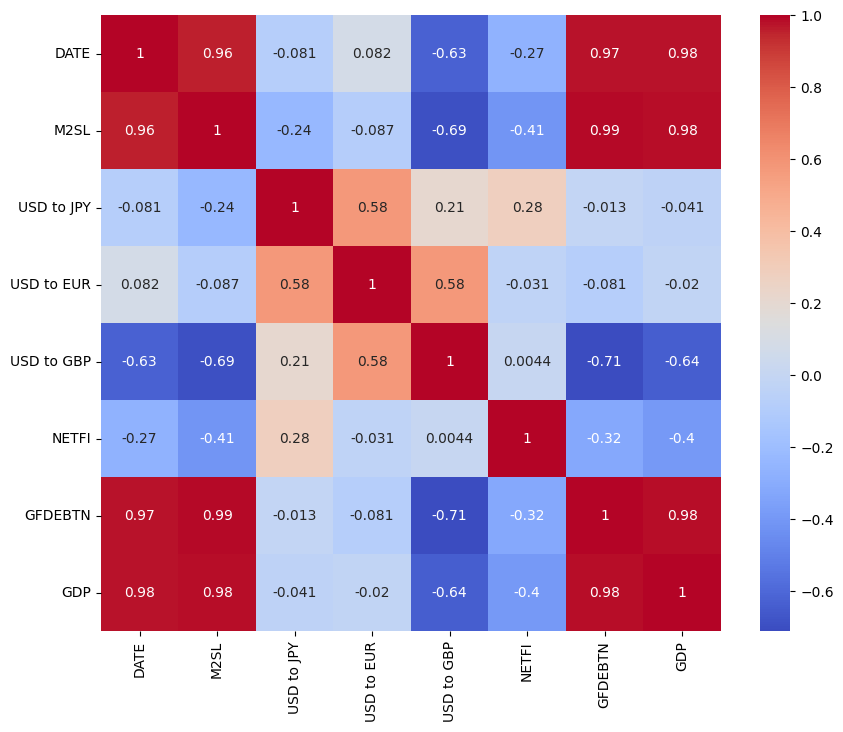

In [ ]:
corr = df_macro.corr()

# Generating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr

,DATE,M2SL,USD to JPY,USD to EUR,USD to GBP,NETFI,GFDEBTN,GDP
DATE,1.000000,0.956073,-0.081156,0.082031,-0.631518,-0.266822,0.974400,0.976508
M2SL,0.956073,1.000000,-0.236372,-0.086937,-0.693130,-0.412813,0.990010,0.980915
USD to JPY,-0.081156,-0.236372,1.000000,0.577168,0.207502,0.281784,-0.012984,-0.040748
USD to EUR,0.082031,-0.086937,0.577168,1.000000,0.577307,-0.031116,-0.081437,-0.020010
USD to GBP,-0.631518,-0.693130,0.207502,0.577307,1.000000,0.004425,-0.712453,-0.641311
NETFI,-0.266822,-0.412813,0.281784,-0.031116,0.004425,1.000000,-0.323880,-0.397808
GFDEBTN,0.974400,0.990010,-0.012984,-0.081437,-0.712453,-0.323880,1.000000,0.984925
GDP,0.976508,0.980915,-0.040748,-0.020010,-0.641311,-0.397808,0.984925,1.000000


Strong Correlations with M2 Money Supply (M2SL):

Positive correlation with DATE (0.956073): Indicates that as time progresses, M2 money supply tends to increase. This is expected as economies grow over time.
Highly positive correlation with Gross Federal Debt (GFDEBTN) (0.990010) and Gross Domestic Product (GDP) (0.980915):** This suggests that as the money supply increases, so do the GDP and the national debt. An expanding money supply often accompanies economic growth (reflected in GDP) and might be used to finance government debt.
Negative correlation with USD to GBP exchange rate (-0.693130): Suggests that an increase in the M2 money supply is associated with a depreciation of the GBP relative to the USD.
Exchange Rates:

USD to JPY: Shows a significant positive correlation with USD to EUR (0.577168) and a moderate positive correlation with USD to GBP (0.207502), indicating that movements in USD to JPY tend to move in the same direction as these currencies but more strongly with EUR. This may suggest common underlying factors affecting these rates, such as USD strength or global economic conditions.
USD to EUR and USD to GBP show a strong positive correlation (0.577307), indicating that when the USD appreciates/depreciates against the EUR, it likely does the same against the GBP.
Net Federal Investments (NETFI) show a weak correlation with most variables except for a somewhat stronger negative correlation with M2SL (-0.412813) and a positive correlation with USD to JPY (0.281784). This suggests that federal investments have a modest impact on the money supply and some exchange rates but are not the primary drivers.

Strong negative correlations of USD to GBP with M2SL (-0.693130) and GFDEBTN (-0.712453), as well as GDP (-0.641311), suggest that as the US economy grows and the money supply and debt increase, the GBP tends to depreciate relative to the USD.

The DATE variable shows high positive correlations with M2SL, GFDEBTN, and GDP, indicating overall economic growth over time, with increasing money supply, debt, and GDP values.